<center> <h1> Finansal Veri Analizi, Tahmini ve İlişkili Hisselerin Belirlenmesi
</h1>
</center>

---
<br>

# Proje Amacı :
Bu proje, İstanbul Borsası'nda işlem gören hisse senetlerinin finansal verilerini analiz etmeyi, gelecekteki fiyatlarını tahmin etmeyi ve bu hisseler arasındaki ilişkileri belirlemeyi amaçlamaktadır. Finansal veri analizi makine öğrenimi ve derin öğrenme tekniklerini kullanarak, hisse senetlerinin fiyat hareketlerini anlamak ve yatırım kararlarını desteklemek hedeflenmektedir. Ayrıca, hisseler arasındaki korelasyonları inceleyerek, birbiriyle ilişkili hisseleri tespit etmek ve yatırımcılara çeşitlendirme stratejileri için rehberlik etmek planlanmaktadır.

<br>

<h3>Kullanılacak İndikatörler :</h3>

- <strong>RSI(Relative Strength Index)</strong>

- <strong>Ichimoku Bulutu</strong>

- <strong>SMA(Simple Moving Average)</strong>

- <strong>Bollinger Bantları</strong>

- <strong>MACD (Moving Average Convergence Divergence)</strong>

<br>

<h3>Proje Adımları :</h3>

<ol>
  <li>Veri setinin eklenmesi.</li>
  <li>Verinin İncelenmesi.</li>
  <li>Günlük fiyat değişimlerinin standart sapmasının bulunması</li>
  <li>Kapanış Fiyat değerlerinin görselleştirilmesi</li>
  <li>SMA İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>RSI İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>Bollinger Bantlarının hesaplanması ve görselleştirilmesi</li>
  <li>Ichimoku Bulutu'nun hesaplanması ve görselleştirilmesi</li>
  <li>MACD İndikatörünün hesaplanması</li>
  <li>Derin öğrenme modelinin oluşturulması.</li>
  <li>Modelin gerçek verilerle test edilmesi.</li>
  <li>Modelin yılsonu fiyatlandırması için tahminde bulunması</li>
  <li>Kolere ve ters kolere hisselerin bulunması</li>
  <li>Kolere/Ters Kolere hisselerin graflar ile görselleştirilmesi</li>
  <li>Modeldeki muhtemel sapma unsurunun bulunması ve görselleştirilmesi.</li>
</ol>


<br>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Verinin İncelenmesi

In [3]:
# Örnek Bir Veri İle Çalışma
start = "2022-01-01"
end ="2024-04-14"
veri = yf.download(["SASA.IS"],start = start,end = end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
veri.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,11.398881,11.581349,11.205680,11.431081,11.431081,69185667
2022-01-04,11.506215,12.128753,11.484748,11.903351,11.903351,166496972
2022-01-05,11.924818,12.021419,11.710150,11.935552,11.935552,68966324
2022-01-06,11.806751,12.150220,11.710150,11.763817,11.763817,73099102
2022-01-07,11.892618,11.999952,11.592082,11.849684,11.849684,59209793


In [5]:
veri.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,40.540001,40.900002,38.500000,38.500000,38.500000,47711933
2024-04-03,38.480000,39.299999,38.380001,38.439999,38.439999,35452917
2024-04-04,38.599998,39.240002,37.799999,37.799999,37.799999,50633051
2024-04-05,38.119999,40.119999,38.040001,39.660000,39.660000,73770633
2024-04-08,39.799999,41.080002,39.520000,40.380001,40.380001,50309471


In [6]:
veri.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
veri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,37.066354,38.055595,36.212465,37.074000,37.074000,5.839793e+07
std,16.325343,16.813134,15.852931,16.321697,16.321697,3.935194e+07
min,9.123398,9.548441,9.037531,9.037531,9.037531,6.000000e+00
25%,19.783821,20.170224,19.375952,19.865395,19.865395,3.380904e+07
50%,42.074966,42.847775,40.500000,41.340000,41.340000,5.023253e+07
75%,48.515015,49.894445,47.248472,48.396040,48.396040,7.519635e+07
max,80.414711,81.187515,75.820808,79.985374,79.985374,2.336351e+08


# Günlük kapanış farklarının incelenmesi ve standart sapmanın bulunması.

---

**Standar Sapma neden önemlidir ?**
 - Standart sapma fiyat oynaklığını yani volaliteyi ölçebilmek için önemlidir.
 - Standart sapma, fiyat hareketlerinin ne kadar değişken olduğunu göstererek, fiyat tahminlerinin güvenilirliğini değerlendirmeye yardımcı olabilir.

**Volalite Nedir ?**
- Volatilite, fiyat tahmini yaparken kullanılan bir faktördür. Yüksek volatilite, fiyatların belirsizliğini artırır ve bu da gelecekteki fiyatları tahmin etmeyi zorlaştırır.

In [8]:
fark = veri["Close"].diff()

In [9]:
fark.head()

Date
2022-01-03         NaN
2022-01-04    0.472270
2022-01-05    0.032201
2022-01-06   -0.171735
2022-01-07    0.085867
Name: Close, dtype: float64

In [10]:
std = fark.std()

In [11]:
print("Standart Sapma :", std)

Standart Sapma : 1.6846518320509773


<br>

# Kapanış Fiyatının Görselleştirilmesi

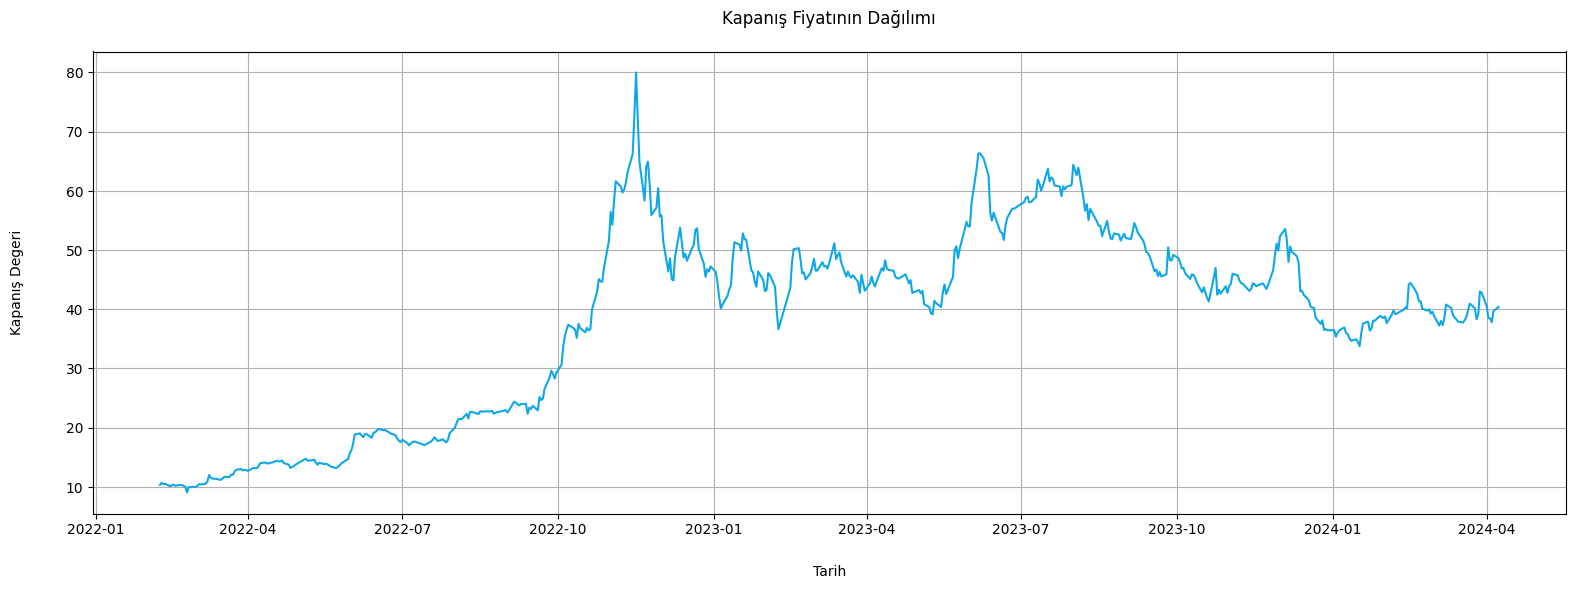

In [31]:
plt.figure(figsize=(19,6))
plt.plot(veri["Close"],"#0ea8e6")
plt.xlabel("Tarih",labelpad=20)
plt.ylabel("Kapanış Degeri", labelpad=30)
plt.title("Kapanış Fiyatının Dağılımı",pad=20)
plt.grid()

# SMA(Simple Moving Average) İndikatörü


---


**Basit Hareketli Ortalama (SMA) Nedir?**

 Basit Hareketli Ortalama (SMA), finansal analizde sıkça kullanılan bir tekniktir. SMA, belirli bir zaman dilimi içindeki fiyatların ortalamasını alarak, fiyatların düzgünleştirilmiş bir gösterimini sağlar. Bu yöntem, fiyat hareketlerindeki gürültüyü azaltmak ve temel eğilimleri belirlemek için kullanılır.


<ipython-input-30-8a21dfac6d96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri['SMA20'] = simple_moving_average(veri, period=20)
<ipython-input-30-8a21dfac6d96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri['SMA50'] = simple_moving_average(veri, period=50)
<ipython-input-30-8a21dfac6d96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

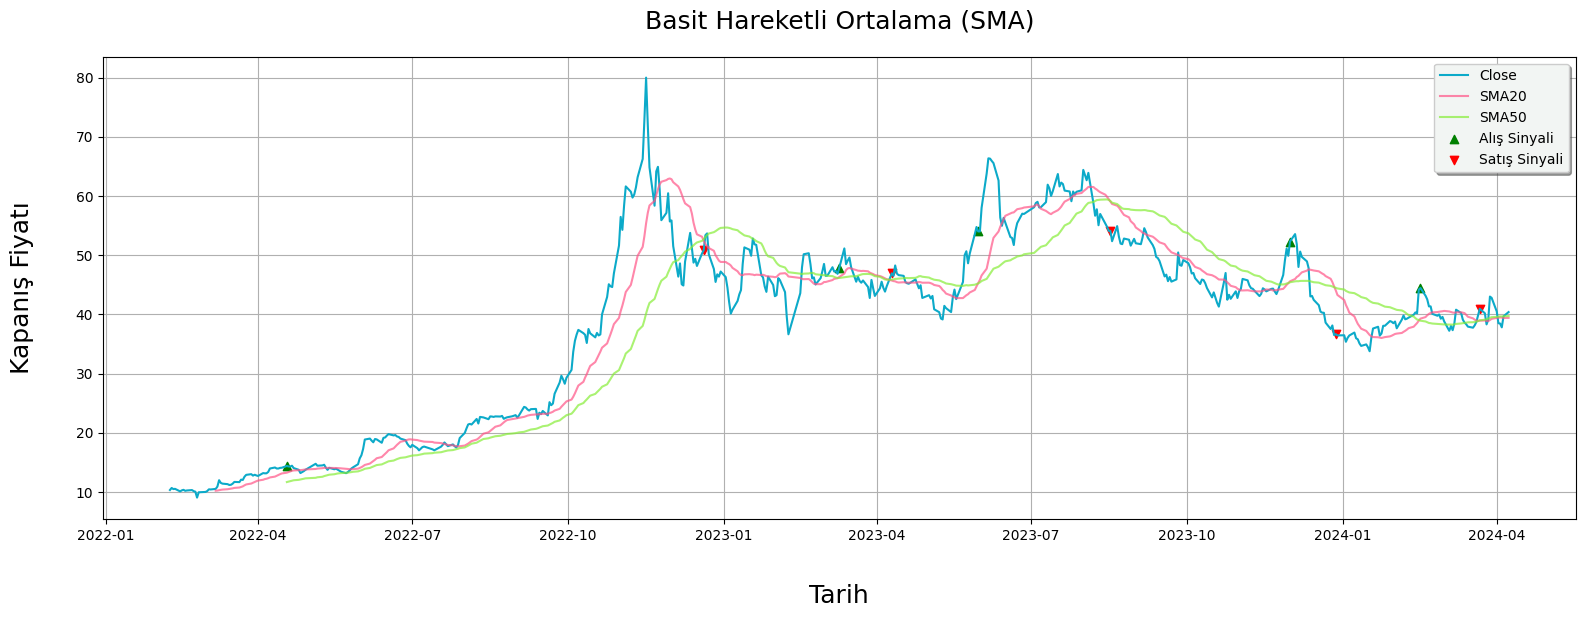

In [30]:
def simple_moving_average(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Hareketli ortalamaları hesapla
veri['SMA20'] = simple_moving_average(veri, period=20)
veri['SMA50'] = simple_moving_average(veri, period=50)

# Alış ve satış sinyallerini hesapla
veri['Signal'] = np.where(veri['SMA20'] > veri['SMA50'], 1, 0)
veri['Position'] = veri['Signal'].diff()

# Alış ve satış fiyatlarını işaretle
veri['Buy'] = np.where(veri['Position'] == 1, veri['Close'], np.nan)
veri['Sell'] = np.where(veri['Position'] == -1, veri['Close'], np.nan)

# Grafiği çiz
plt.figure(figsize=(19, 6))
plt.plot(veri['Close'], label='Close', color="#0caac9")
plt.plot(veri['SMA20'], alpha=0.7, label='SMA20', color="#ff5487")
plt.plot(veri['SMA50'], alpha=0.7, label='SMA50', color="#86ed37")
plt.scatter(veri.index, veri['Buy'], alpha=1, label='Alış Sinyali', marker='^', color='green')
plt.scatter(veri.index, veri['Sell'], alpha=1, label='Satış Sinyali', marker='v', color='red')
plt.title('Basit Hareketli Ortalama (SMA)', fontsize=18, pad=20)
plt.xlabel('Tarih', fontsize=18, labelpad=30)
plt.ylabel('Kapanış Fiyatı', fontsize=18, labelpad=30)
plt.legend(shadow=True, facecolor="#f2f5f3")
plt.grid()

# Bollinger Bantları


---

**Bollinger Bantları Nedir ?**

Bollinger Bantları, volatiliteyi ölçmek ve fiyatların aşırı alım veya aşırı satım seviyelerine ulaşıp ulaşmadığını belirlemek için kullanılır. Bantların daralması, piyasada düşük volatiliteyi gösterirken, genişlemesi yüksek volatiliteyi gösterir. Fiyatlar üst banttan çıktığında aşırı alım, alt banttan çıktığında ise aşırı satım sinyali olarak yorumlanabilir.

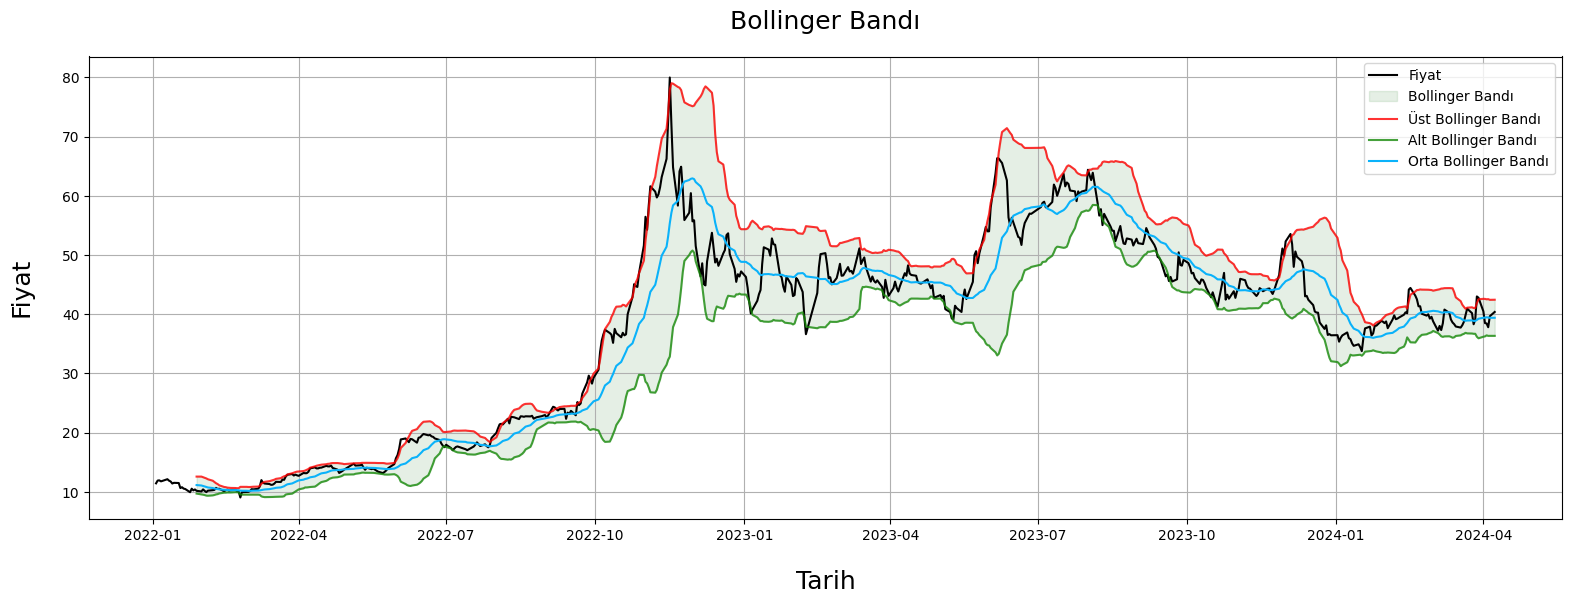

In [14]:
veri["SMA"] = veri["Close"].rolling(window=20).mean()
veri["SD"] = veri["Close"].rolling(window=20).std()
veri["UB"] = veri["SMA"] + (2*veri["SD"])
veri["LB"] = veri["SMA"] - (2*veri["SD"])

plt.figure(figsize=(19,6))
plt.plot(veri.index, veri["Close"], label="Fiyat", color="black")
plt.fill_between(veri.index, veri["UB"], veri["LB"], color="darkgreen", alpha=0.1, label="Bollinger Bandı")
plt.plot(veri.index, veri["UB"],label="Üst Bollinger Bandı", color="red", alpha=0.8)
plt.plot(veri.index, veri["LB"], label="Alt Bollinger Bandı",color="#188a0b", alpha=0.8)
plt.plot(veri.index, veri["SMA"], label="Orta Bollinger Bandı", color="#0ab2fa")
plt.title("Bollinger Bandı", fontsize=18, pad=20)
plt.xlabel("Tarih", fontsize=18, labelpad=20)
plt.ylabel("Fiyat", fontsize=18,labelpad=20)
plt.legend()
plt.grid(True)

# Ichimoku Bulutu



---


**Ichimoku Bulutu Nedir ?**

Ichimoku Kinko Hyo bulutları, bir varlığın trendini belirlemek ve potansiyel alım-satım noktalarını tanımlamak için kullanılır. Bulutların inceltilmesi veya genişlemesi, varlığın momentumunu ve trendini gösterir. Bulutların kesişmeleri, potansiyel alım veya satım sinyalleri olarak yorumlanabilir. Ichimoku Kinko Hyo bulutları ayrıca stop-loss seviyelerini belirlemek için de kullanılabilir.

**Bullish ve Bearish Nedir ?**

<ul>

<li>

**Bullish:**  "Bullish" terimi, piyasanın yükseliş eğiliminde olduğunu ifade eder. Bu durumda, fiyatların genellikle arttığı veya artma olasılığının yüksek olduğu düşünülür. Yatırımcılar "bullish" olduğunda, genellikle fiyatların yükseleceğine inanarak alım yaparlar veya mevcut pozisyonlarını korurlar.
</li>
<li>

**Bearish:** "Bearish" terimi ise tam tersi durumu ifade eder. Piyasanın düşüş eğiliminde olduğu veya fiyatların genellikle düşeceği düşünülür. Yatırımcılar "bearish" olduğunda, fiyatların düşeceğine inanarak satış yapabilirler veya mevcut pozisyonlarını kapatıp bekleyebilirler.</li>

</ul>



In [15]:
# En yüksek ve en düşük değerlerin hareketli ortalamasını hesaplama
high9 = veri.High.rolling(9).max()
low9 = veri.High.rolling(9).min()

high26 = veri.High.rolling(26).max()
low26 = veri.High.rolling(26).min()

high52 = veri.High.rolling(52).max()
low52 = veri.High.rolling(52).min()

In [16]:
# Çizgileri Hesaplama
veri["tenkan_sen"] = (high9 + low9) / 2 # Tenkan Sen çizgisini hesapla
veri["kijun_sen"] = (high26 + low26) / 2 # Kijun Sen çizgisini hesapla
veri["senkou_A"] = ((veri.tenkan_sen + veri.kijun_sen) / 2).shift(26) # Senkou A çizgisini hesapla
veri["senkou_B"] = ((high52 + low52) / 2).shift(26) # Senkou B çizgisini hesapla
veri["chikou"] = veri.Close.shift(-26) # Chikou çizgisini hesapla
veri = veri.iloc[26:]

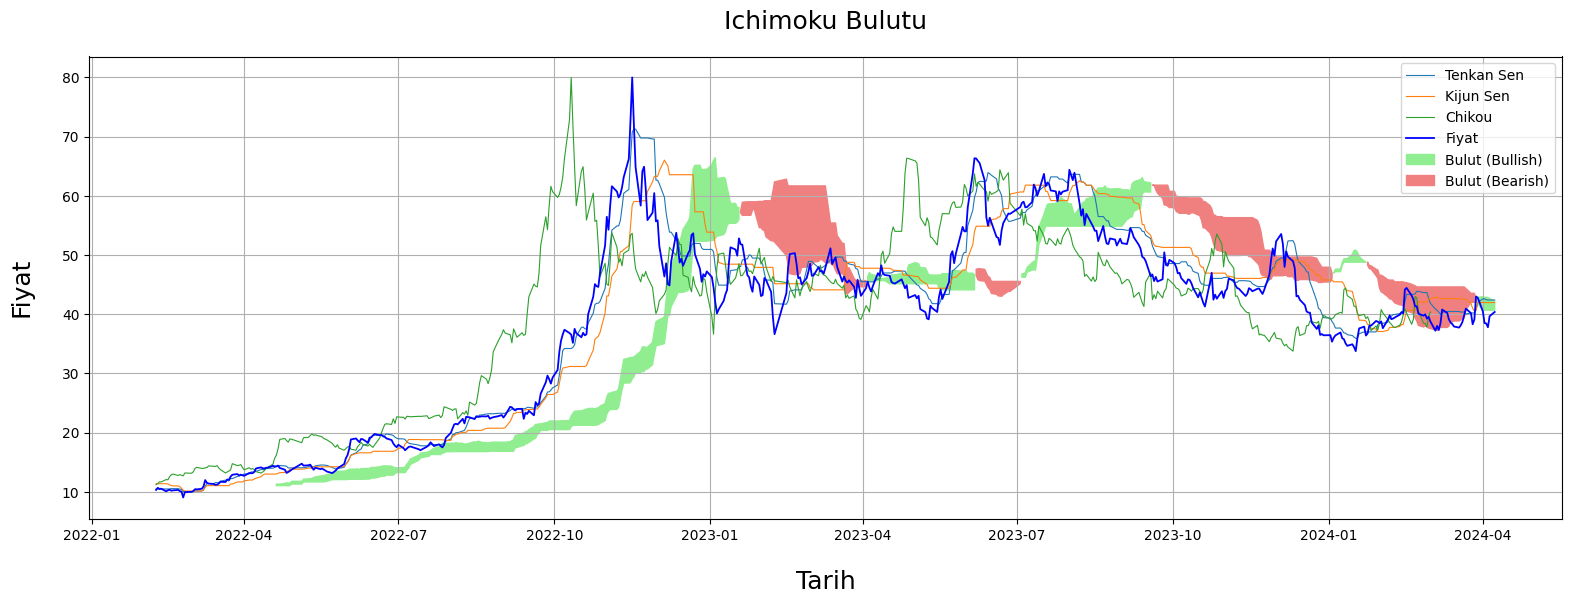

In [17]:
# Görselleştirme
fig, ax = plt.subplots(figsize=(19, 6))
# Tenkan Sen, Kijun Sen ve Chikou çizgilerini çiz
plt.plot(veri.index, veri["tenkan_sen"], lw=0.8, label="Tenkan Sen")
plt.plot(veri.index, veri["kijun_sen"], lw=0.8, label="Kijun Sen")
plt.plot(veri.index, veri["chikou"], lw=0.8, label="Chikou")

# Grafik başlığı ve eksen etiketleri
plt.title("Ichimoku Bulutu", fontsize=18, pad=20)
plt.ylabel("Fiyat", fontsize=18, labelpad=20)
plt.xlabel("Tarih", fontsize=18, labelpad=20)

# Fiyat çizgisini çiz
plt.plot(veri.index, veri["Adj Close"], lw=1.3, color="b", label="Fiyat")

# Senkou A ve Senkou B arasını doldurarak bulutları çiz
plt.fill_between(veri.index, veri.senkou_A, veri.senkou_B, where=veri.senkou_A >= veri.senkou_B, color="lightgreen", label="Bulut (Bullish)")
plt.fill_between(veri.index, veri.senkou_A, veri.senkou_B, where=veri.senkou_A < veri.senkou_B, color="lightcoral", label="Bulut (Bearish)")

plt.grid()
plt.legend()

# Relative Strength Index (RSI)



---


**RSI(Relative Strength Index) Nedir?**

RSI (Relatif Güç Endeksi), teknik analizin temel göstergelerinden biridir ve piyasadaki fiyat momentumunu ölçmek için kullanılır. RSI, genellikle aşırı alım ve aşırı satım koşullarını belirlemek için kullanılır ve trader'ların piyasada olası dönüşler hakkında fikir edinmelerine yardımcı olur.


**RSI Nasıl Yorumlanır ?**



1.   Aşırı Alım ve Aşırı Satım Sinyalleri: RSI'nin 70'in üzerine çıkması genellikle aşırı alımı, 30'un altına düşmesi ise aşırı satımı gösterebilir. Bu durumlar, fiyatın kısa vadede tersine dönebileceğini ve bir düzeltme veya trend değişikliği olabileceğini işaret edebilir.

2.   Diverjanslar: RSI ile fiyat arasında pozitif veya negatif diverjanslar oluşabilir. Örneğin, fiyat yeni bir yüksek yaparken, RSI yeni bir yüksek yapmıyorsa, bu fiyatın güçlenmekte olduğuna dair bir uyarı olabilir.

3.   Trendin Onaylanması: RSI, bir fiyat trendinin devam edip etmediğini teyit etmek için kullanılabilir. Özellikle bir yükseliş trendinde, fiyatlar yükselirken RSI'nin 50'nin üzerinde kalması, yükseliş trendinin güçlü olduğunu gösterebilir.

4.    Destek ve Direnç Seviyeleri: RSI, destek ve direnç seviyelerini belirlemek için de kullanılabilir. Özellikle RSI'nin belirli bir seviyede bir süre kaldığında bu seviye destek veya direnç olarak işlev görebilir.



In [22]:
delta = veri["Adj Close"].diff(1)
delta.dropna(inplace = True)

positive = delta.copy()
negative = delta.copy()

positive[positive<0] = 0
negative[negative>0] = 0

days = 14

average_gain = positive.rolling(window = days).mean()
average_loss = abs(negative.rolling(window = days).mean())

relative_strength = (average_gain/average_loss)

RSI = 100.0 - (100.0/(1.0 + relative_strength))

combined = pd.DataFrame()
combined["Adj Close"] = veri["Adj Close"]
combined["RSI"] = RSI

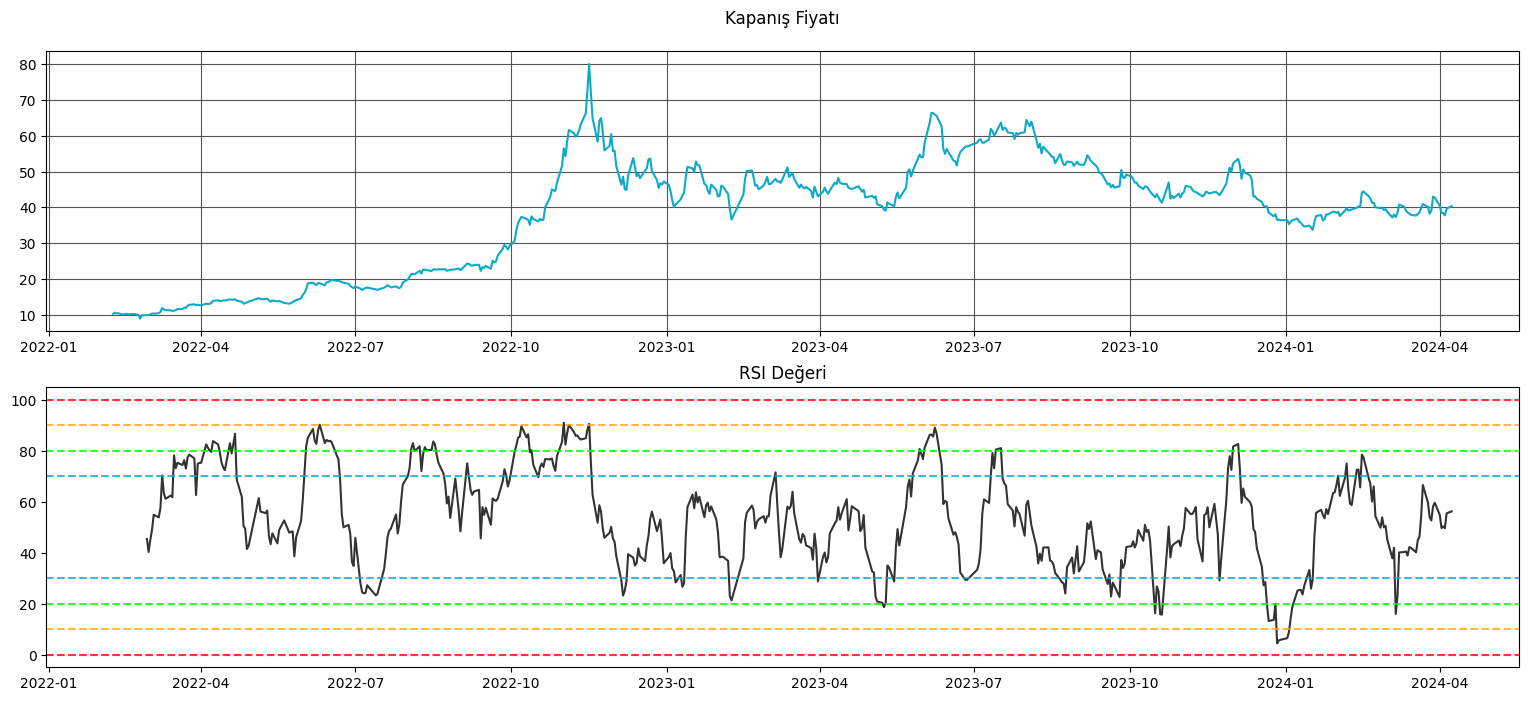

In [50]:
plt.figure(figsize=(19,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined["Adj Close"], color="#0caac9")
ax1.set_title("Kapanış Fiyatı", pad=20)
ax1.grid(True, color = "#555555")
ax1.set_axisbelow(True)

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(combined.index, combined["RSI"], color = "black", alpha=0.8)
ax2.axhline(0, linestyle="--", alpha=0.8, color="#ff0000")
ax2.axhline(10, linestyle="--", alpha=0.8, color="#ffaa00")
ax2.axhline(20, linestyle="--", alpha=0.8, color="#00ff00")
ax2.axhline(30, linestyle="--", alpha=0.8, color="#0caac9")
ax2.axhline(70, linestyle="--", alpha=0.8, color="#0caac9")
ax2.axhline(80, linestyle="--", alpha=0.8, color="#00ff00")
ax2.axhline(90, linestyle="--", alpha=0.8, color="#ffaa00")
ax2.axhline(100, linestyle="--", alpha=0.8, color="#ff0000")

ax2.set_title("RSI Değeri")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor("white")